In [2]:
#Importando Pacotes:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
import altair as alt
import os as os
#Importando Módulos:
from freedom import freedom
from data import data
from analyze import analyze
#Importando Mais Limpeza de dados:
import clean_data

C:\Users\Bianca\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


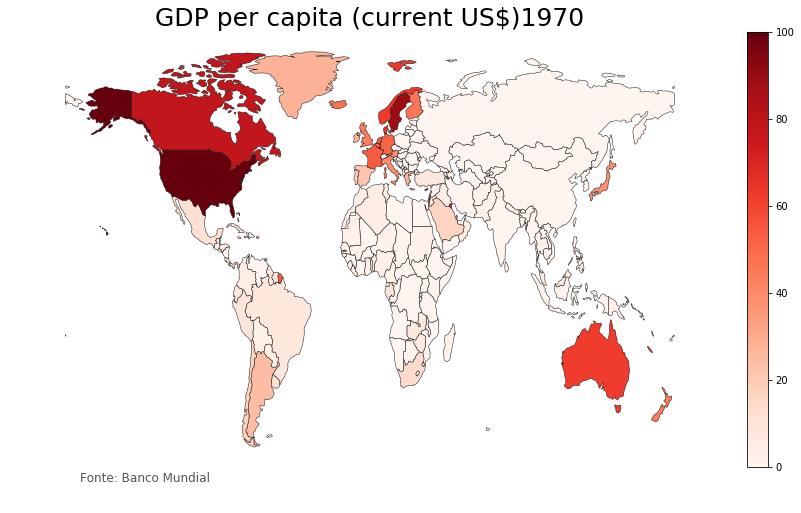

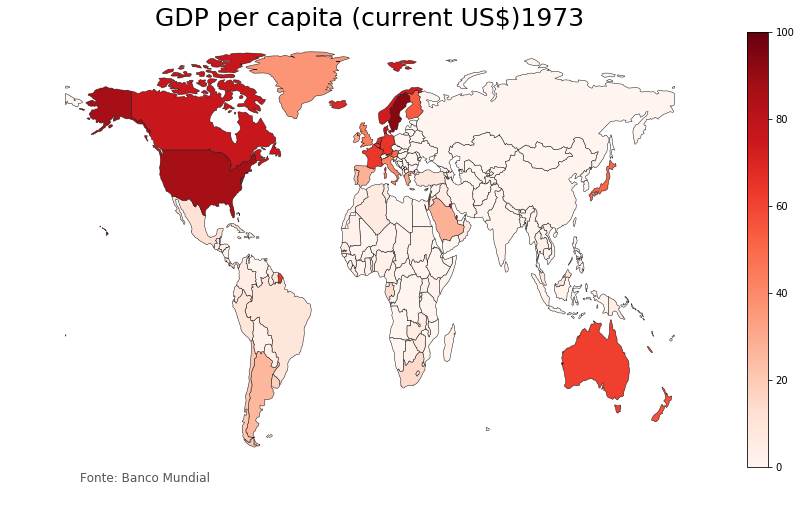

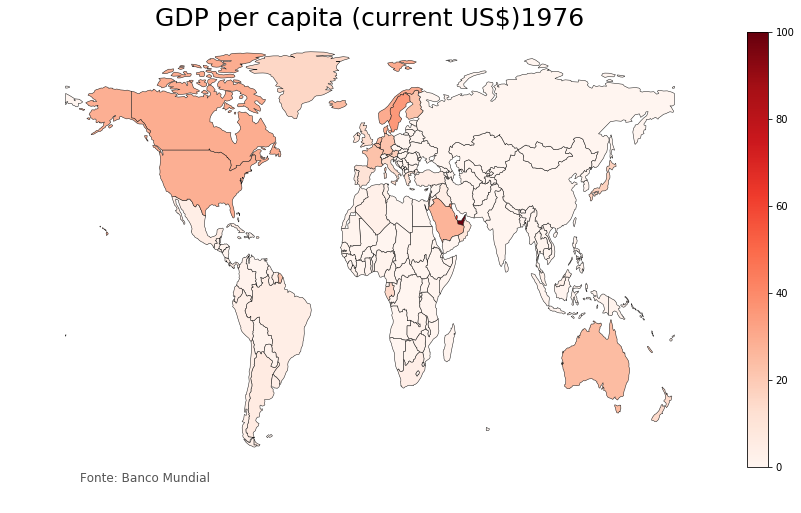

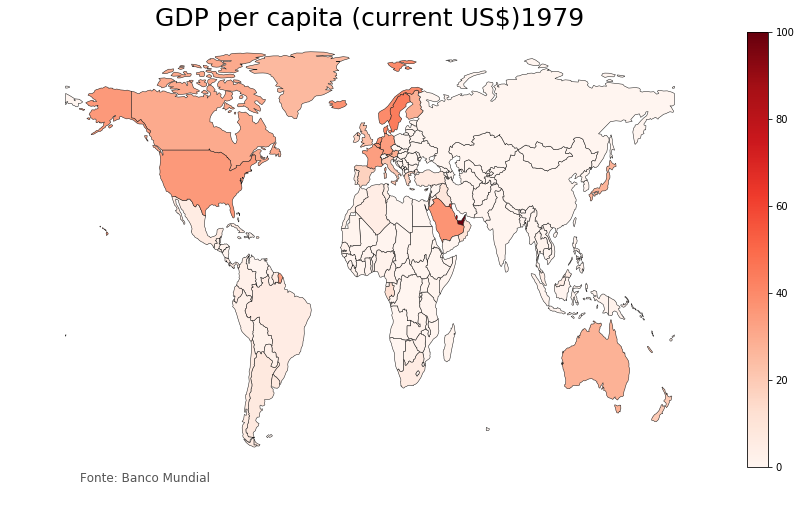

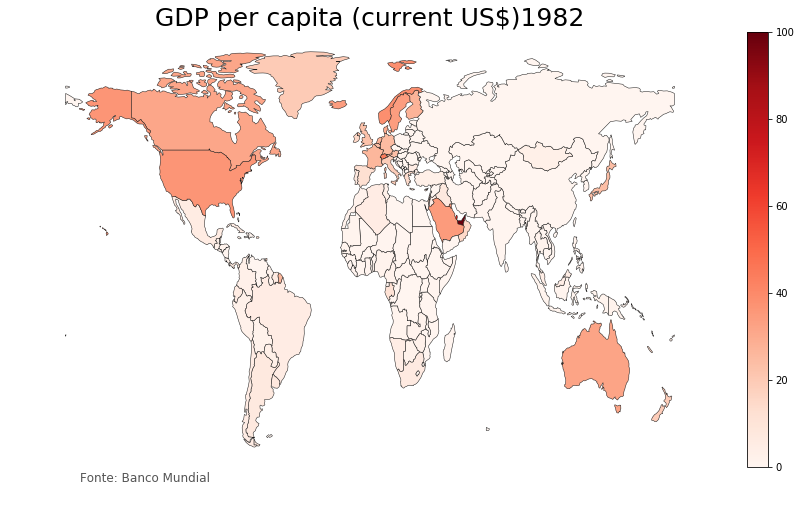

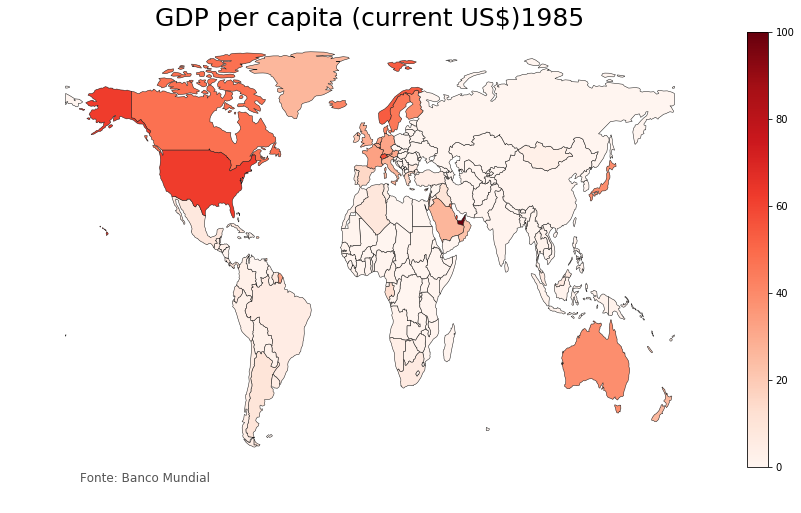

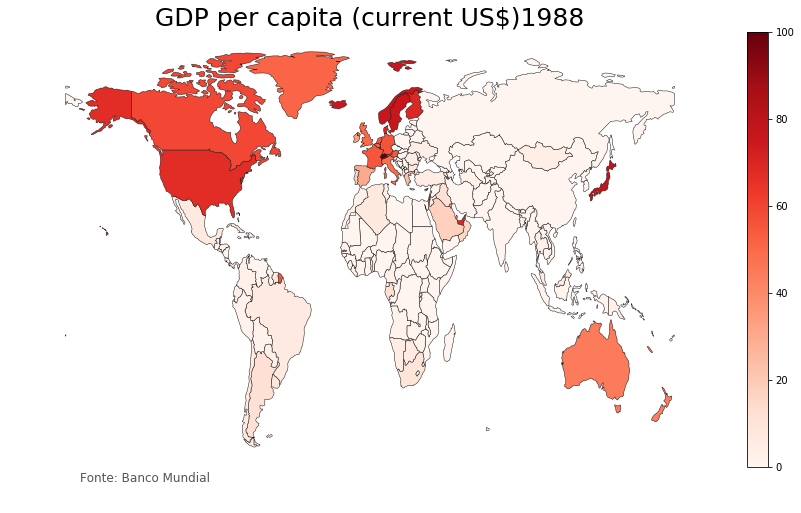

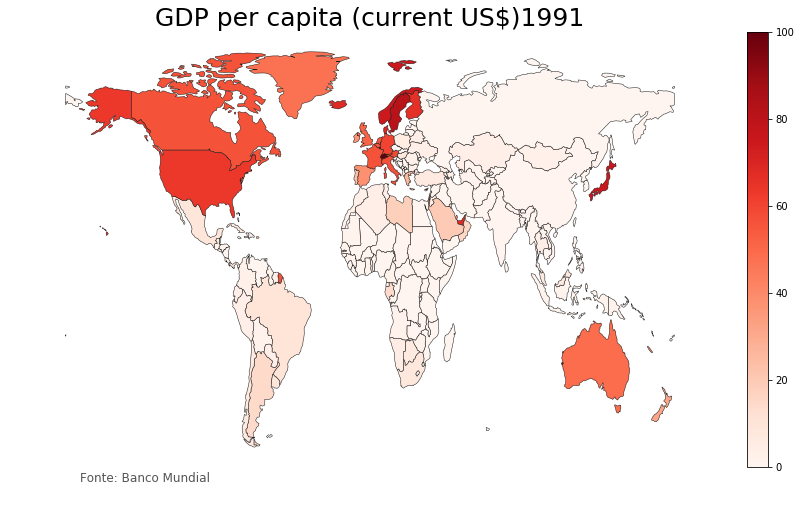

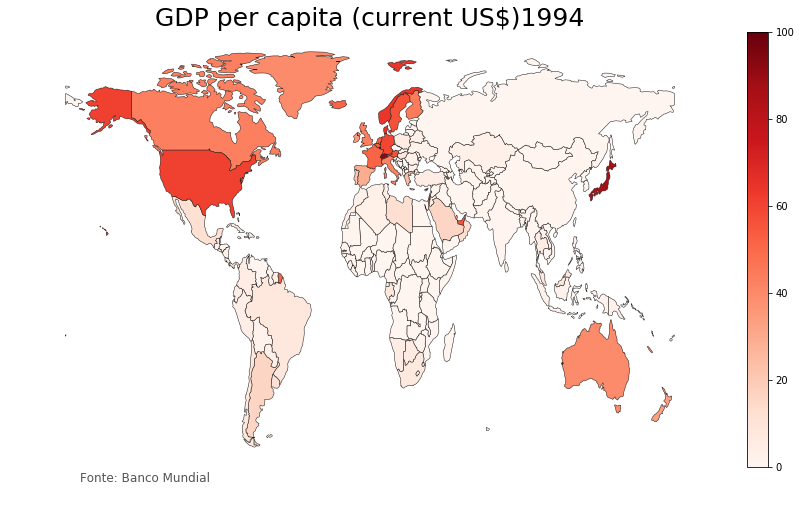

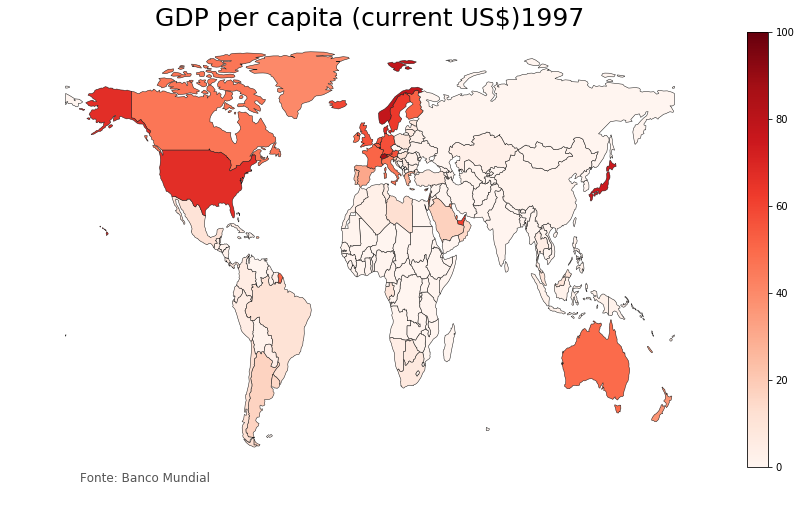

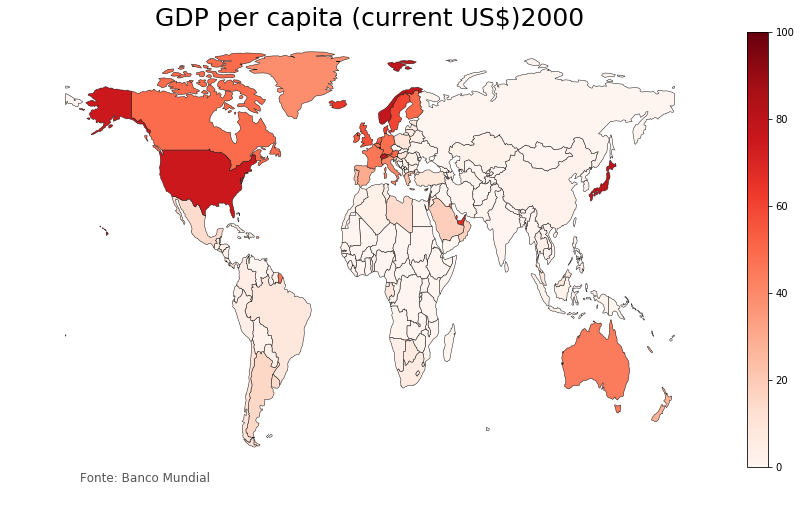

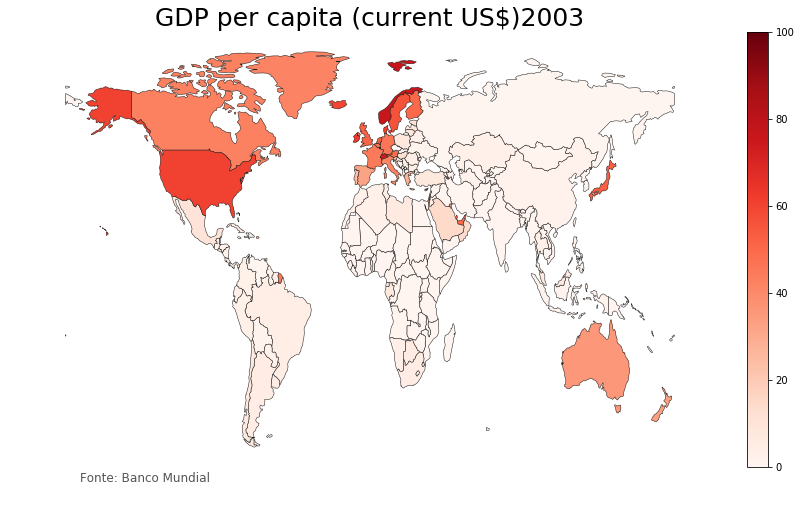

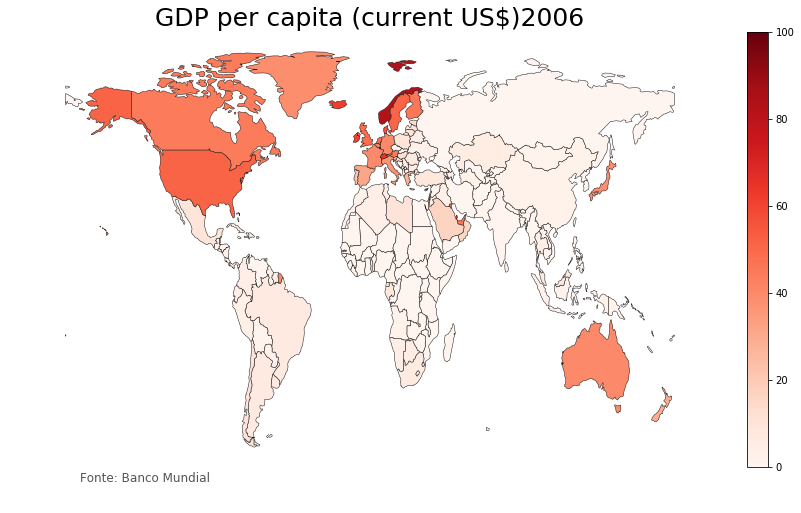

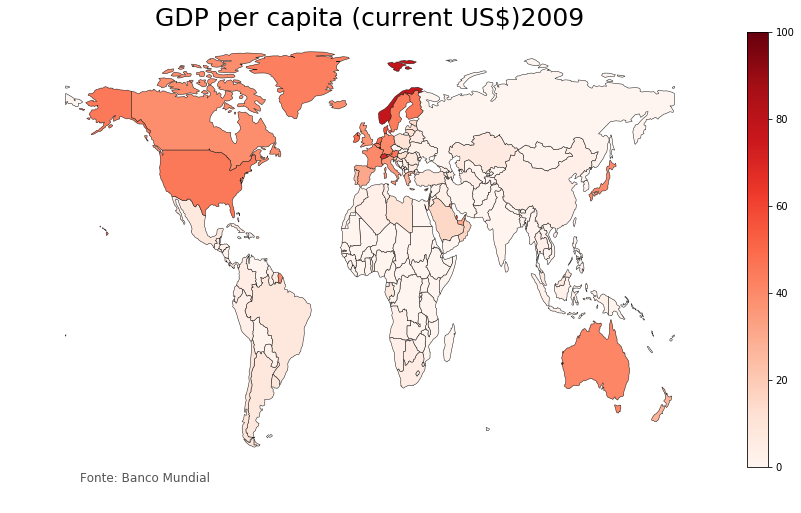

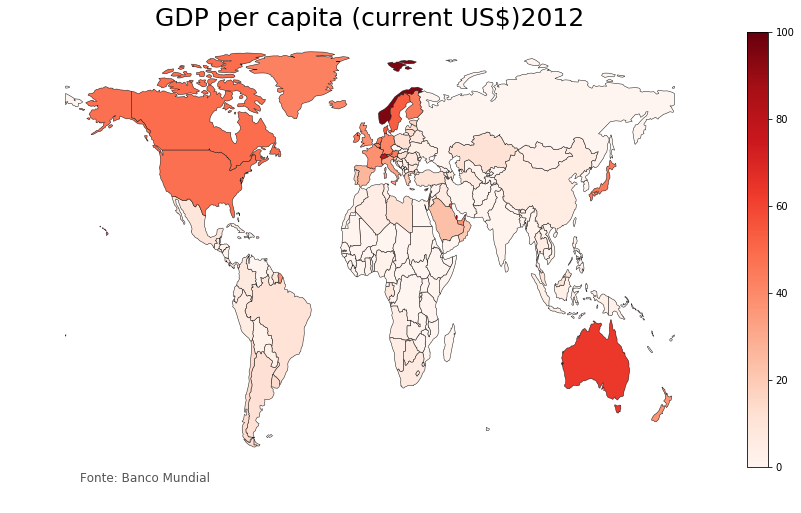

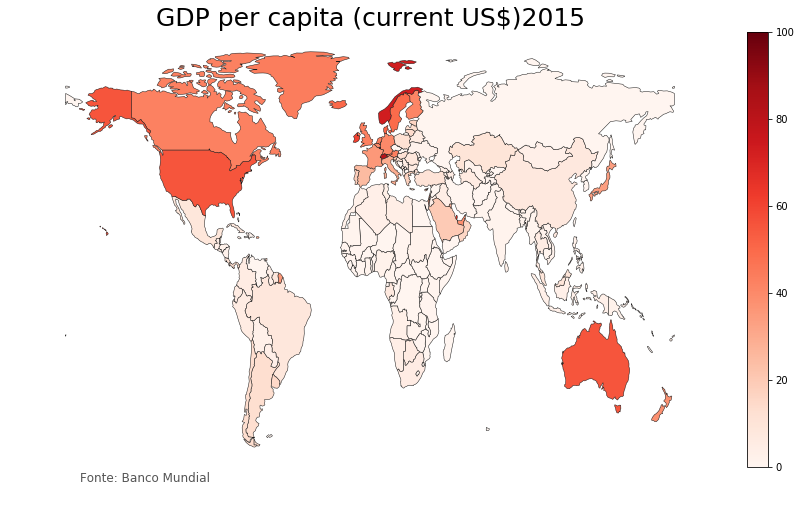

In [19]:
list_year= [str(num) for num in range(1970,2017,3)]
for year in  list_year:
    #Dados do PIB per capita de 'year':
    gdp = analyze(data,"GDP per capita (current US$)")
    gdp2017 = pd.DataFrame(gdp[year])
    #Mapa do Mundo:
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    #Eliminando a Antarctica:
    world = world[(world.pop_est>0) & (world.name!="Antarctica")]
    #Mesclando as tabelas:
    merged = world.set_index('name').join(gdp2017)
    #Definindo dimensões e variáveis para o gráfico e legenda:
    variable = year
    vmin,vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(15, 8))
    #Plotando o gráfico:
    imagem=merged.plot(column=variable, cmap='Reds',linewidth=0.5, ax=ax, edgecolor='0.1') 
    #Colocando legenda:
    ax.axis('off')
    ax.set_title("GDP per capita (current US$)" + year, fontdict={'fontsize': '25', 'fontweight' : '3'})
    ax.annotate('Fonte: Banco Mundial',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    #Salvando cada imagem do diretório
    caminho = os.path.join('Pastadogif', year+'_gdp.png')
    grafico = imagem.get_figure()
    grafico.savefig(caminho, dpi=300)

In [28]:
#for i in *.png:
#    do sips -s format jpeg -s formatOptions 70 "${i}" --out "${i%png}jpg"
#convert -delay 60 -loop 0 1970_gdp.jpg 1973_gdp.jpg1976_gdp.jpg 1979_gdp.jpg 1982_gdp.jpg 1985_gdp.jpg 1988_gdp.jpg 1991_gdp.jpg 1994_gdp.jpg 1997_gdp.jpg 2000_gdp.jpg 2003_gdp.jpg 2006_gdp.jpg 2009_gdp.jpg 2012_gdp.jpg 2015_gdp.jpg gdpworld.gif